In [2]:
import pandas as pd
import numpy as np
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
%matplotlib inline

In [6]:
train_date = pd.DatetimeIndex(train['datetime'])
train['year'] = train_date.year
train['month'] = train_date.month
train['hour'] = train_date.hour
train['dayofweek'] = train_date.dayofweek

In [7]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,4,5


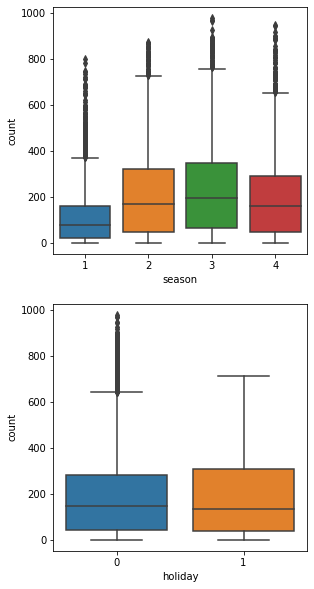

In [8]:
fig = plt.figure(figsize=(10, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='season', y='count', data=train)
plt.subplot(gs1[2:, 1:3])
sns.boxplot(x='holiday', y='count', data=train)

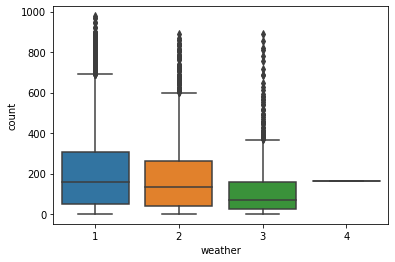

In [9]:
sns.boxplot(x='weather', y='count', data=train)

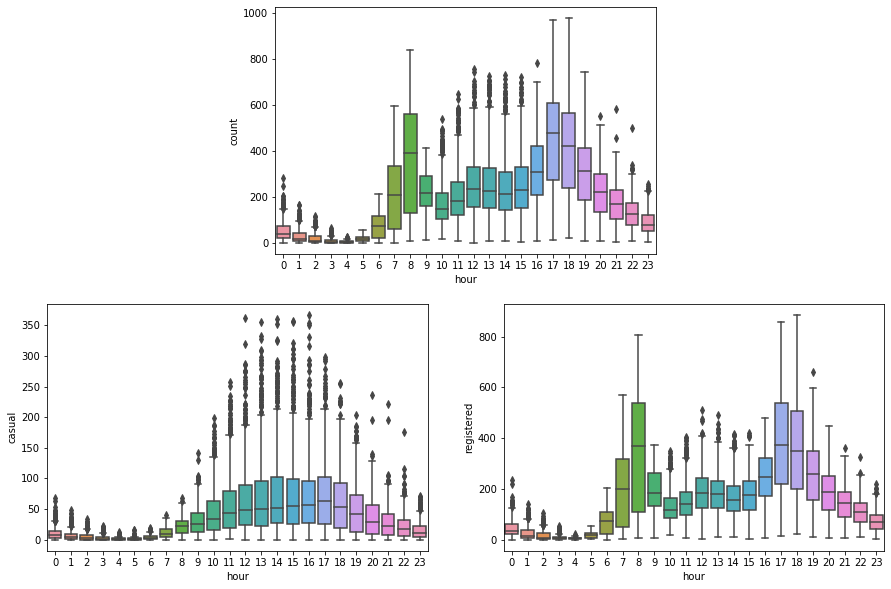

In [10]:
fig = plt.figure(figsize=(15, 10))
gs1 = GridSpec(4, 4, fig, wspace=0.5, hspace=0.5)
plt.subplot(gs1[:2, 1:3])
sns.boxplot(x='hour', y='count', data=train)
plt.subplot(gs1[2:, :2])
sns.boxplot(x='hour', y='casual', data=train)
plt.subplot(gs1[2:, 2:])
sns.boxplot(x='hour', y='registered', data=train)
plt.show()

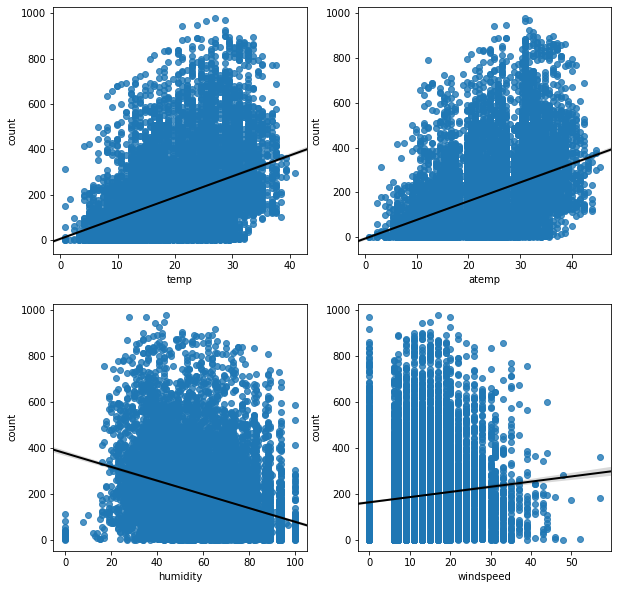

In [11]:
fig = plt.figure(figsize=(10, 10))
plt.subplot(gs1[:2, :2])
sns.regplot(x='temp', y='count', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[:2, 2:])
sns.regplot(x='atemp', y='count', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, :2])
sns.regplot(x='humidity', y='count', data=train,
            line_kws={"color":"black", "linewidth":2})
plt.subplot(gs1[2:, 2:])
sns.regplot(x='windspeed', y='count', data=train,
            line_kws={"color":"black", "linewidth":2})

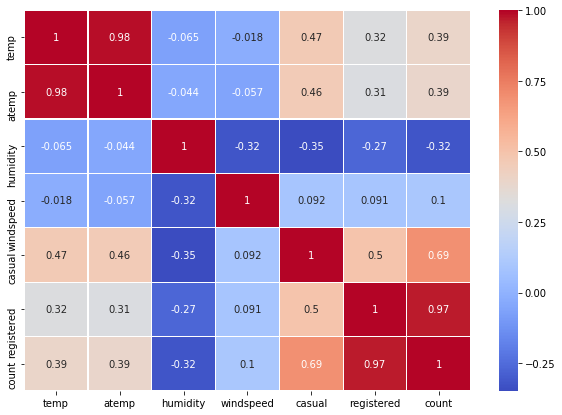

In [18]:
train_ = train.iloc[:,5:12]
plt.figure(figsize = (10,7))
tc = train_.corr()
sns.heatmap(tc, annot = True, cmap = 'coolwarm', linecolor = 'white', linewidths=0.1)